## Import Dependencies

In [2]:
#import libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



## Load Data

In [3]:
file_path = os.path.join(os.path.dirname('./'), 'train.csv')
data = pd.read_csv(file_path)

In [4]:
# Check the first few rows of the data
data.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


## EDA

In [5]:
# Check the shape of the data (number of rows and columns)
data.shape

(67914, 8)

In [6]:
# Check the data types of each column
data.dtypes

image_id       object
class_name     object
class_id        int64
rad_id         object
x_min         float64
y_min         float64
x_max         float64
y_max         float64
dtype: object

In [7]:
# Check for missing values
data.isnull().sum()

image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64

In [8]:
# Check basic statistics of numerical columns
data.describe()

,class_id,x_min,y_min,x_max,y_max
count,67914.000000,36096.000000,36096.000000,36096.000000,36096.000000
mean,9.979312,1051.332696,1065.262051,1492.269337,1456.660489
std,5.036494,565.838078,552.925133,595.384126,581.134138
min,0.000000,0.000000,0.000000,68.000000,103.000000
25%,7.000000,602.000000,627.000000,1010.000000,1009.000000
50%,13.000000,1014.500000,935.000000,1567.000000,1411.000000
75%,14.000000,1457.000000,1471.000000,1947.000000,1911.000000
max,14.000000,2934.000000,3133.000000,3131.000000,3384.000000


            class_name  counts
0           No finding   31818
1   Aortic enlargement    7162
2         Cardiomegaly    5427
3   Pleural thickening    4842
4   Pulmonary fibrosis    4655
5          Nodule/Mass    2580
6         Lung Opacity    2483
7     Pleural effusion    2476
8         Other lesion    2203
9         Infiltration    1247
10                 ILD    1000
11       Calcification     960
12       Consolidation     556
13         Atelectasis     279
14        Pneumothorax     226


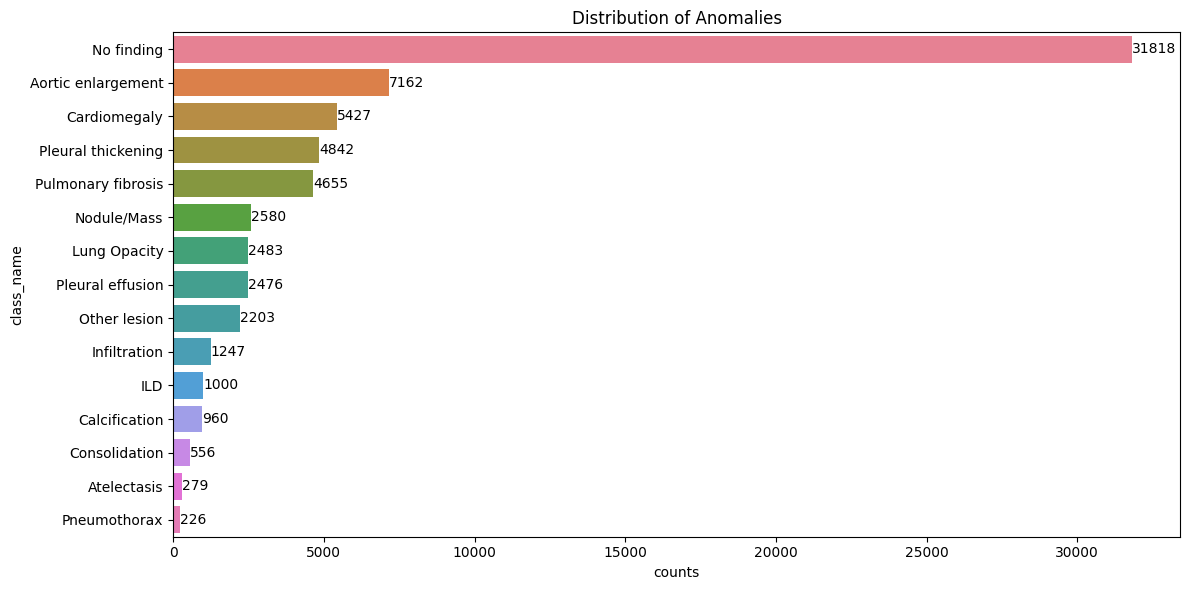

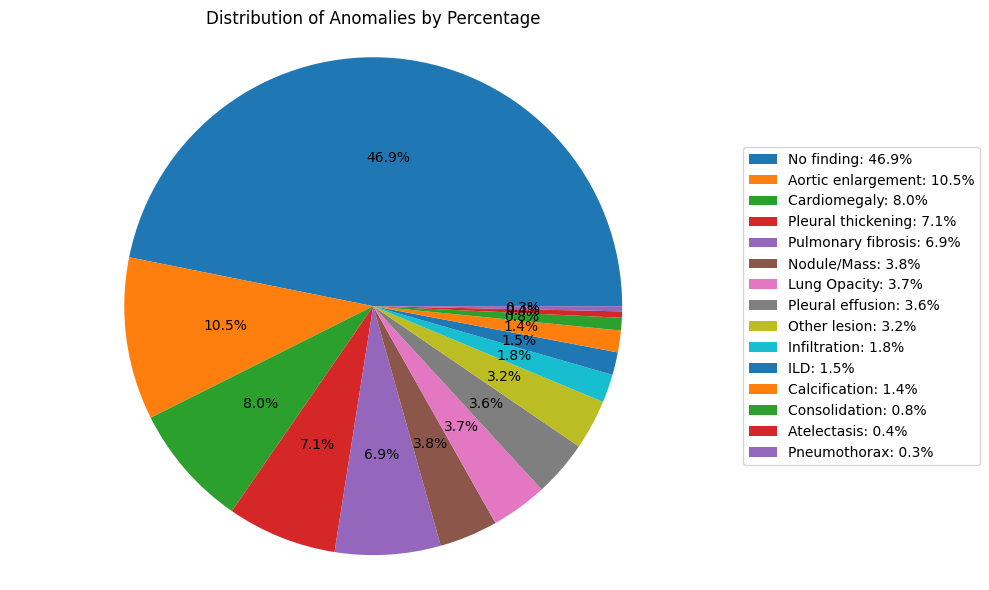

   rad_id  counts
0      R9   15708
1     R10   13292
2      R8   12198
3      R2    3121
4      R5    2783
5      R3    2285
6      R6    2041
7      R1    1995
8     R13    1824
9     R15    1823
10    R16    1763
11     R7    1733
12    R12    1729
13    R11    1670
14    R14    1624
15     R4    1513
16    R17     812


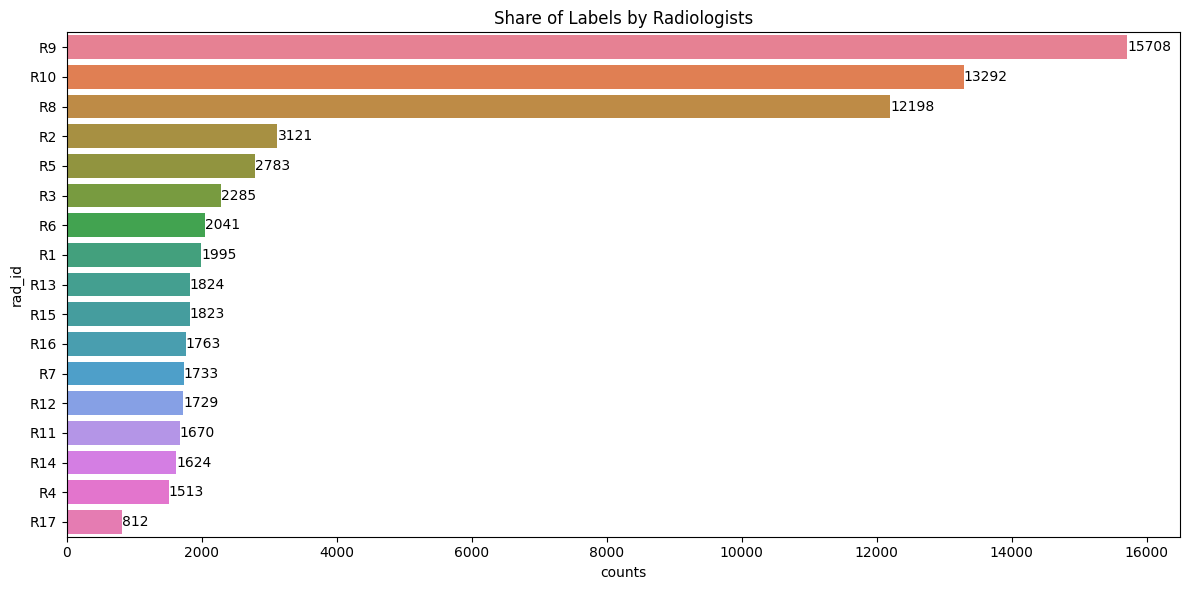

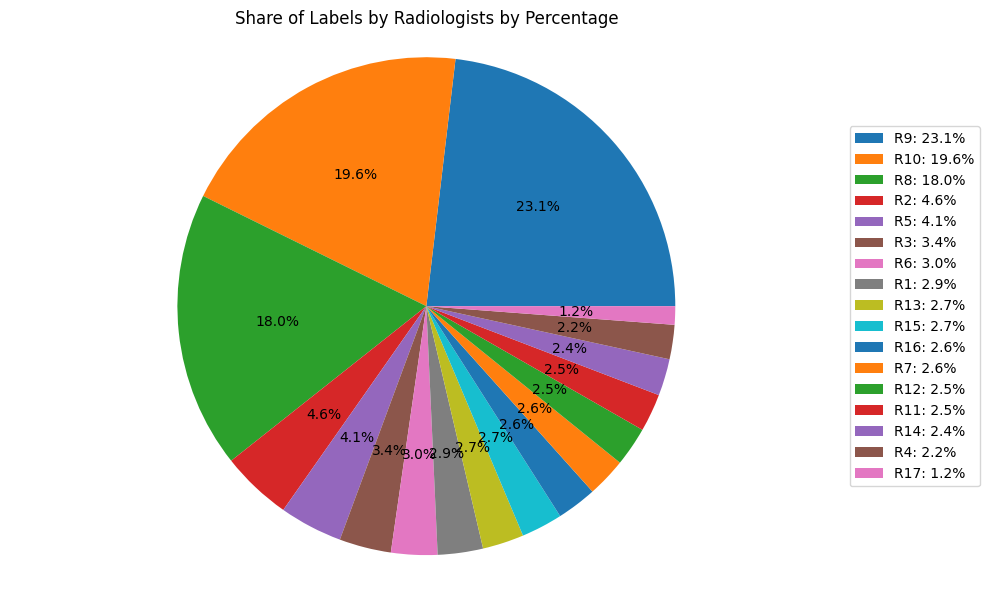

                               image_id  counts
0      03e6ecfa6f6fb33dfeac6ca4f9b459c9      57
1      fa109c087e46fe1ea27e48ce6d154d2f      52
2      e31be972e181987a8600a8700c1ebe88      48
3      6d5acf3f8a973a26844d617fffe72998      46
4      3a302fbbbf3364aa1a7731b59e6b98ec      46
...                                 ...     ...
14995  be353c629cd9b269bbcb6623339283ae       3
14996  43b0f51d257ee4154014ef7724a82644       3
14997  9a4ed54cefaea64fc59bf8debdc79ec9       3
14998  3018e6640df6a1e3f9978cf55c8d0fd3       3
14999  839b2311ffad9bdd9aa98c74aad6e251       3

[15000 rows x 2 columns]


In [9]:

def plot_categorical_distributions(categorical_variable, data, bar_title, pie_title, bar_bool=True, pie_bool=True):
    class_counts = data[categorical_variable].value_counts().rename_axis(categorical_variable).reset_index(name='counts')
    print(class_counts)

    ############### Bar Chart ###############
    if bar_bool:
        # Check the distribution of the anomaly class
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.barplot(y=categorical_variable, x='counts', data=class_counts, ax=ax, hue=categorical_variable, order=class_counts[categorical_variable])
        for container in ax.containers:
            ax.bar_label(container)
        ax.set_title(bar_title)
        plt.tight_layout()
        plt.show()

    ############### Pie Chart ###############
    if pie_bool:
        # Calculate percentage for each class manually
        class_counts['percentage'] = (class_counts['counts'] / class_counts['counts'].sum()) * 100

        # Plot pie chart without labels on the slices but with autopct to show percentages
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.pie(class_counts['counts'], autopct='%1.1f%%')

        # Create custom labels for the legend by combining class name and percentage
        labels = [f'{row[categorical_variable]}: {row.percentage:.1f}%' for index, row in class_counts.iterrows()]

        # Set legend with custom labels
        ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

        # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.axis('equal')
        ax.set_title(pie_title)
        plt.tight_layout()
        plt.show()


plot_categorical_distributions('class_name', data, 'Distribution of Anomalies', 'Distribution of Anomalies by Percentage', True, True)
plot_categorical_distributions('rad_id', data, 'Share of Labels by Radiologists', 'Share of Labels by Radiologists by Percentage', True, True)
plot_categorical_distributions('image_id', data, _, _, False, False)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

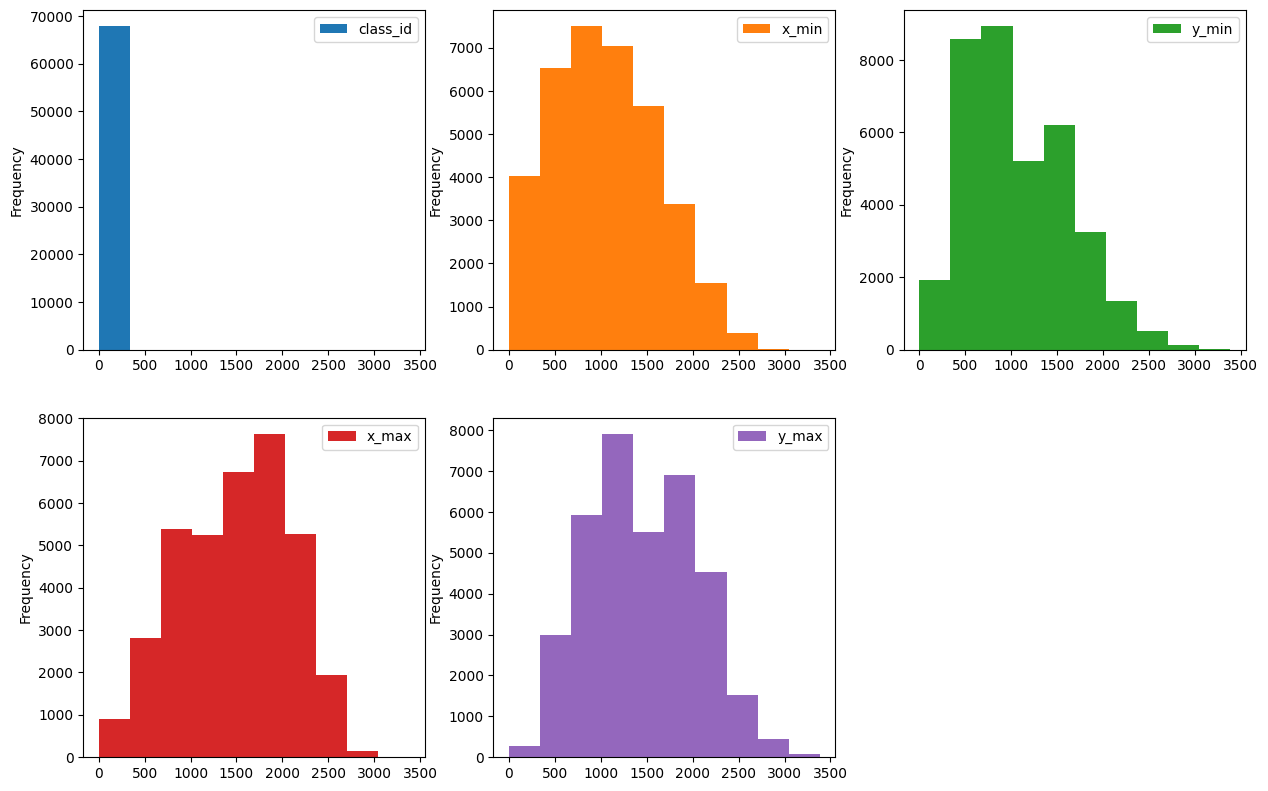

In [10]:
# Check the distribution of numerical columns
data.drop(columns=['image_id', 'class_name', 'rad_id']).plot(kind = 'hist', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,15))

<Axes: >

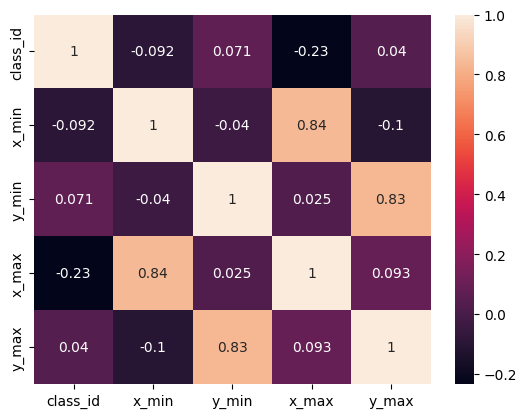

In [11]:
# Check the correlation between numerical columns
sns.heatmap(data.drop(columns=['image_id', 'class_name', 'rad_id']).corr(), annot=True)

## Data Preprocessing

### Image conversion to compatible format

In [12]:
# convert images to jpeg, supported by YOLOv8

import dicom_convert as dconv

dicom_folder = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\train"

In [13]:
# To convert to JPEG
output_folder = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\images_jpg"
dconv.convert_dicom_to_jpeg(dicom_folder, output_folder)

c:\Users\cassm\anaconda3\envs\yolov8\Lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
c:\Users\cassm\anaconda3\envs\yolov8\Lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (14-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# To convert to PNG
output_folder = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\images_png"
dconv.convert_dicom_to_png(dicom_folder, output_folder)

In [ ]:
# To convert to TIFF
output_folder = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\images_tiff"
dconv.convert_dicom_to_tiff(dicom_folder, output_folder)

### Data Sampling: Group classes by number of instances -> Stratify by Class_Name ->  Random Sampling

In [17]:
def count(categorical_variable, data):
    class_counts = data[categorical_variable].value_counts().rename_axis(categorical_variable).reset_index(name='counts')
    print(class_counts)

data_count = count('class_id', data)

    class_id  counts
0         14   31818
1          0    7162
2          3    5427
3         11    4842
4         13    4655
5          8    2580
6          7    2483
7         10    2476
8          9    2203
9          6    1247
10         5    1000
11         2     960
12         4     556
13         1     279
14        12     226


In [18]:
# Define the range of counts for each group
count_ranges = [0, 10, 20, 30, 40, np.inf]
group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

# Group the classes based on the count ranges
data_count['class_group'] = pd.cut(data_count['counts'], bins=count_ranges, labels=group_labels)

# Print the updated dataframe
print(data)


TypeError: 'NoneType' object is not subscriptable

In [19]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = get_testdata_files(r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\train\00b05e693202bb65a0c0ca7a0201495d.dicom")[0]
ds = pydicom.dcmread(filename)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

NotImplementedError: Non-relative patterns are unsupported

c:\Users\cassm\anaconda3\envs\yolov8\Lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


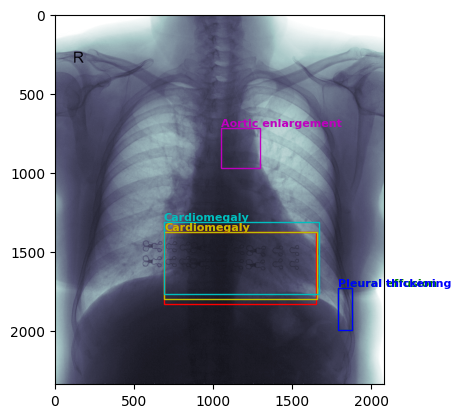

                               image_id          class_name  class_id rad_id  \
2      9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
5517   9a5094b2563a1ef3ff50dc5c7ff71345    Pleural effusion        10     R9   
25023  9a5094b2563a1ef3ff50dc5c7ff71345  Pleural thickening        11     R9   
26165  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3     R9   
42709  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3     R8   
53473  9a5094b2563a1ef3ff50dc5c7ff71345  Aortic enlargement         0     R9   

        x_min   y_min   x_max   y_max  
2       691.0  1375.0  1653.0  1831.0  
5517   1789.0  1729.0  1875.0  1992.0  
25023  1789.0  1729.0  1875.0  1992.0  
26165   692.0  1375.0  1657.0  1799.0  
42709   689.0  1313.0  1666.0  1763.0  
53473  1052.0   715.0  1299.0   966.0  


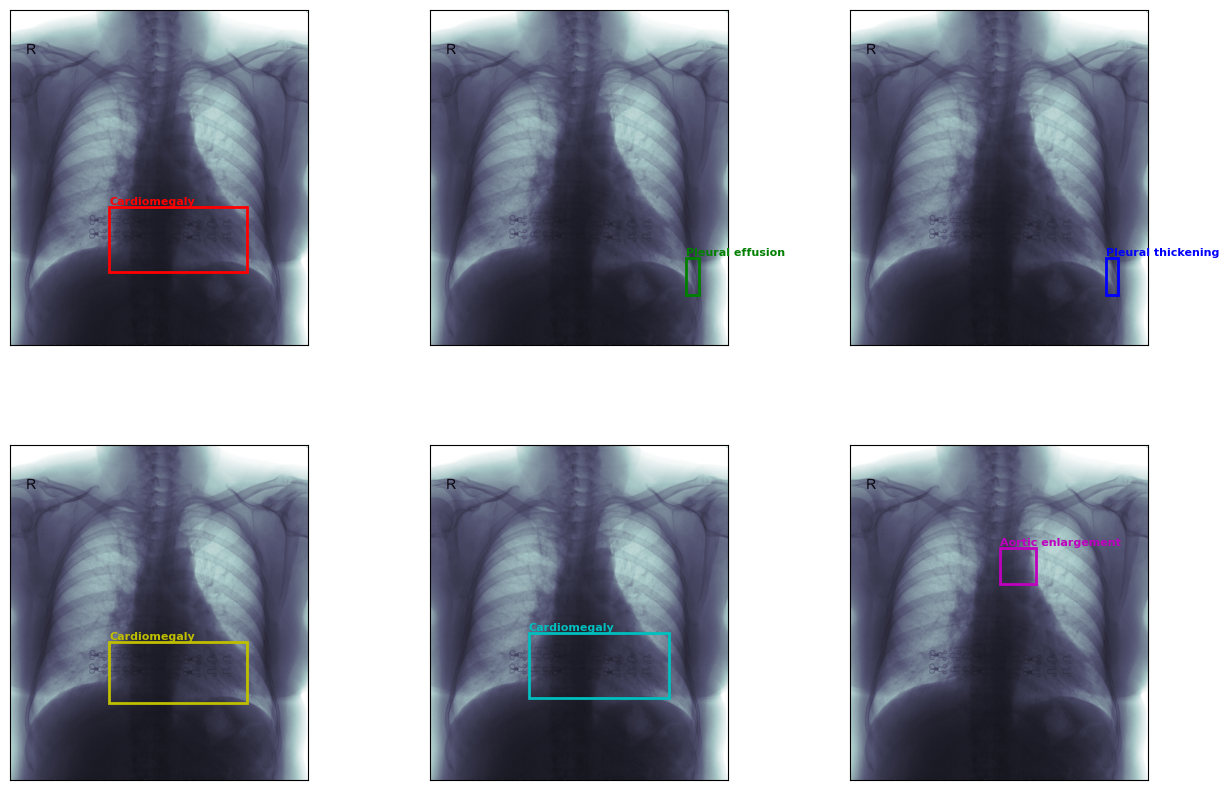

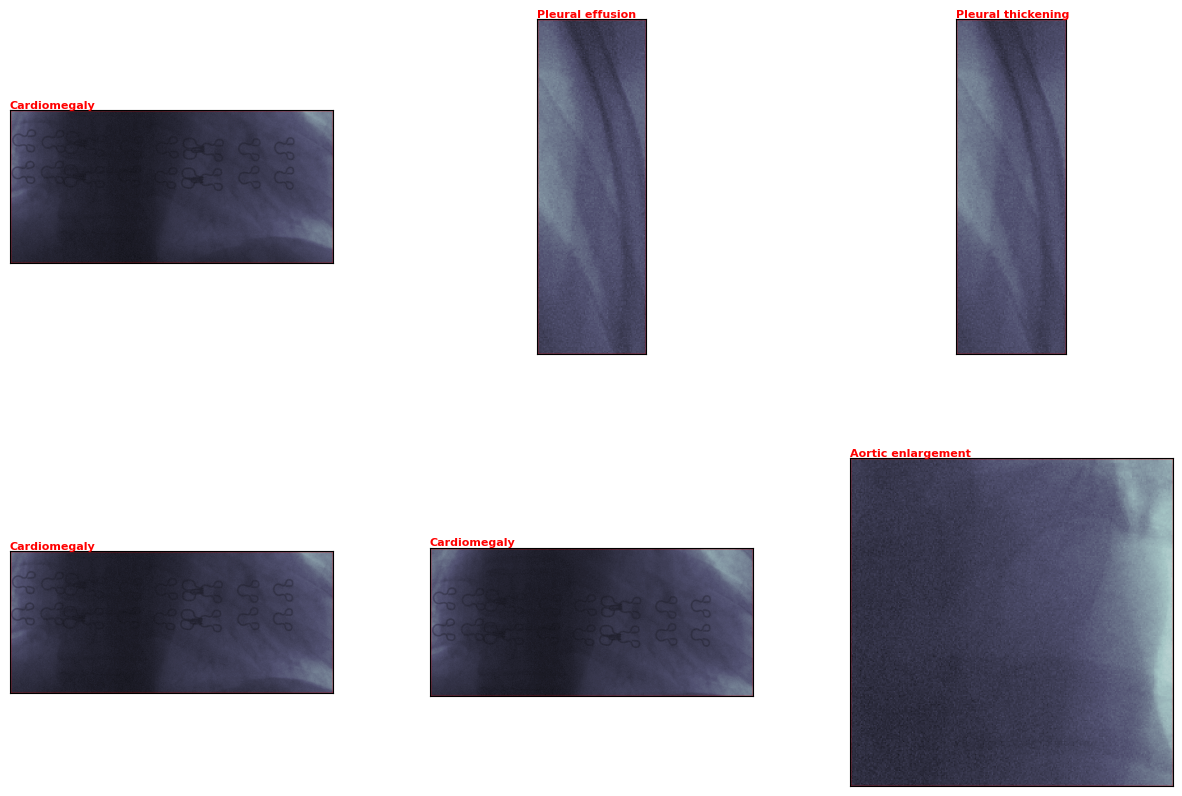

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pydicom

# Provide the full path to the DICOM file
filename = r"C:\Users\cassm\OneDrive\Desktop\vinbigdata-chest-xray-abnormalities-detection\train\9a5094b2563a1ef3ff50dc5c7ff71345.dicom"
image_id = os.path.splitext(os.path.basename(filename))[0]

ds = pydicom.dcmread(filename)

# Find the bounding box for the image_id in the dataframe
bounding_boxes = data[data['image_id'] == image_id]

# Display the image
fig, ax = plt.subplots(1)
ax.imshow(ds.pixel_array, cmap=plt.cm.bone)

# Colors for different instances
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'brown', 'pink']
color_idx = 0

# Draw the bounding boxes and labels
for index, row in bounding_boxes.iterrows():
    # Create a Rectangle patch
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    width, height = x_max - x_min, y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor=colors[color_idx % len(colors)], facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Add label
    label = row['class_name']
    ax.text(x_min, y_min, label, color=colors[color_idx % len(colors)], weight='bold', fontsize=8, ha='left', va='bottom')

    color_idx += 1

plt.show()

print(bounding_boxes)

################Show each bounding box separately####################

####Same plot for each bounding box####

# Determine the number of bounding boxes to create appropriate subplot grid
n_boxes = len(bounding_boxes)
n_cols = 3  # Number of columns in subplot grid
n_rows = n_boxes // n_cols + (n_boxes % n_cols > 0)  # Ensure enough rows to display all boxes

# Create a single figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust space between plots

# Flatten the axis array for easy indexing if it's not already flat
if n_boxes == 1:
    axs = [axs]
elif n_rows > 1:
    axs = axs.flatten()

# Colors for different instances
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'brown', 'pink']

for idx, (index, row) in enumerate(bounding_boxes.iterrows()):
    ax = axs[idx]
    ax.imshow(ds.pixel_array, cmap=plt.cm.bone)
    
    # Draw each bounding box
    color = colors[idx % len(colors)]
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    rect = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    
    # Add label
    label = row['class_name']
    ax.text(x_min, y_min, label, color=color, weight='bold', fontsize=8, ha='left', va='bottom')

    # Keep the view to show the whole image
    ax.set_xlim([0, ds.pixel_array.shape[1]])
    ax.set_ylim([ds.pixel_array.shape[0], 0])  # Inverted because y-coordinates go from top to bottom

    # Optional: Remove axis ticks for cleanliness
    ax.set_xticks([])
    ax.set_yticks([])

# Hide any unused subplots
for ax in axs[n_boxes:]:
    ax.axis('off')

plt.show()

####Separate plot for each bounding box####

'''# Draw separate figs for each bounding box
for index, row in bounding_boxes.iterrows():
    fig, ax = plt.subplots(1)
    ax.imshow(ds.pixel_array, cmap=plt.cm.bone)

    # Create a Rectangle patch
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    width, height = x_max - x_min, y_max - y_min
    color = colors[index % len(colors)]  # Cycle through colors
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor=color, facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Add label
    label = row['class_name']
    ax.text(x_min, y_min, label, color=color, weight='bold', fontsize=8, ha='left', va='bottom')

    plt.show()'''

################Only Show Images Inside the Bounding Boxes####################

# Determine the number of bounding boxes to create appropriate subplot grid
n_boxes = len(bounding_boxes)
n_cols = 3  # Number of columns in subplot grid
n_rows = n_boxes // n_cols + (n_boxes % n_cols > 0)  # Ensure enough rows to display all boxes

# Create a single figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust space between plots

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Loop through bounding boxes and create subplots
for idx, (index, row) in enumerate(bounding_boxes.iterrows()):
    ax = axs[idx]
    ax.imshow(ds.pixel_array, cmap=plt.cm.bone)
    
    # Draw the bounding box and label
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    width, height = x_max - x_min, y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    # Add label
    label = row['class_name']
    ax.text(x_min, y_min, label, color='r', weight='bold', fontsize=8, ha='left', va='bottom')
    
    # Set the subplot's view to the bounding box
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_max, y_min])  # Inverted because y-coordinates go from top to bottom in images
    
    # Optional: Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Hide any unused subplots
for ax in axs[n_boxes:]:
    ax.axis('off')

plt.show()